In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
    
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
digits = {
    0: [[0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,1,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]],
    
    1: [[0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,0,0,0,0,0]],
    
    2: [[0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,1,1,1,1,1,0],
        [0,1,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]],
    
    3: [[0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,0,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]],
    
    4: [[0,0,0,0,0,0,0],
        [0,0,1,0,1,0,0],
        [0,0,1,0,1,0,0],
        [0,0,1,1,1,1,0],
        [0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0],
        [0,0,0,0,0,0,0]],
    
    5: [[0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,1,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]],
    
    6: [[0,0,0,0,0,0,0],
        [0,0,1,1,1,1,0],
        [0,1,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,1,0,0,0,1,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,0,0]],
    
    7: [[0,0,0,0,0,0,0],
        [0,1,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,0,0,0,1,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,0,0,0,0,0]],
    
    8: [[0,0,1,1,1,0,0],
        [0,1,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,0,1,1,1,0,0],
        [0,1,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,0,1,1,1,0,0]],

    9: [[0,0,1,1,1,0,0],
        [0,1,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,0,1,1,1,1,0],
        [0,0,0,0,0,1,0],
        [0,1,0,0,0,1,0],
        [0,0,1,1,1,0,0]],
}

for i in digits:
    # https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb
    m = np.concatenate([np.concatenate([[x]*4 for x in y]*4) for y in digits[i]])
    digits[i] = m.reshape(28,28)

In [3]:
# Load train and test datasets
train_df = pd.read_csv("../input/digit-recognizer/train.csv")
test_df = pd.read_csv("../input/digit-recognizer/test.csv")

In [4]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check if train and test dataset have the same number of columns
# Exclude first column `label` from the comparison
assert train_df.iloc[:, 1:].columns.equals(test_df.columns), "train_df and test_df do not have the same columns"

print(f"train_df.shape: {train_df.shape}")
print(f"test_df.shape: {test_df.shape}")

train_df.shape: (42000, 785)
test_df.shape: (28000, 784)


In [7]:
def train_test_split(X, y, test_size=0.1):
    # Ensure that X and y are numpy arrays. If they're not, convert them.
    X = np.array(X)
    y = np.array(y)
    
    # Create a range from 0 to the length of X rows
    indices = np.arange(X.shape[0])
    # Suffle indices
    np.random.shuffle(indices)
    
    # Determine the split index
    split_idx = int(X.shape[0] * (1 - test_size))
    
    # Split the indices into training and testing parts
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    
    # Split the data and labels into training and testing sets
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    return X_train, X_test, y_train, y_test

In [8]:
# Split the training dataset into training and validation datasets
y = train_df.iloc[:, 0]  # Select all rows of the first column (label column)
X = train_df.iloc[:, 1:] # Select all rows and all columns except the first one

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.1)

print(f"training dataset: {X_train.shape}")
print(f"validation dataset: {X_validate.shape}")

training dataset: (37800, 784)
validation dataset: (4200, 784)


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

def build_model(layer_sizes=[128]):
    layers = []
    
    # input layer
    input_size = 784
    for layer_size in layer_sizes:
        layers.append(nn.Linear(input_size, layer_size, bias=False))
        layers.append(nn.ReLU())
        input_size = layer_size  # update the input size for the next layer
    
    # output layer
    output_size = 10
    layers.append(nn.Linear(input_size, output_size, bias=False))
    
    model = nn.Sequential(*layers)

    return model


In [10]:
def get_batches_numpy(data, labels, batch_size):
    indices = np.arange(len(data))
    np.random.shuffle(indices)
    
    num_batches = len(data) // batch_size
    
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx   = start_idx + batch_size
        batch     = indices[start_idx:end_idx]
        yield data[batch], labels[batch]

In [11]:
from torch.utils.data import TensorDataset, DataLoader

def get_batches_pytorch(inputs, labels, batch_size):
    inputs = inputs if torch.is_tensor(inputs) else torch.tensor(inputs, dtype=torch.float)
    labels = labels if torch.is_tensor(labels) else torch.tensor(labels)
    
    dataset = TensorDataset(inputs, labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [12]:
def predict(model, inputs):
    # Forward pass without tracking gradients
    with torch.no_grad():
        inputs = inputs if torch.is_tensor(inputs) else torch.tensor(inputs, dtype=torch.float)
        
        outputs = model(inputs)        
        probabilities = F.softmax(outputs, dim=1)
        predictions = torch.argmax(outputs, dim=1)
        
        return predictions.numpy()

In [13]:
def accuracy(labels, predictions):
    labels = labels if torch.is_tensor(labels) else torch.tensor(labels)
    
    # Calculate the number of correct predictions
    correct_predictions = torch.sum(predictions == labels)

    # To calculate accuracy
    accuracy = correct_predictions.item() / labels.size(0)
    
    return accuracy*100

In [14]:
def predict_digits(model):
    X_test_digits = np.array([d.flatten() for d in digits.values()])
    y_pred_digits = predict(model, X_test_digits)

    fig, ax = plt.subplots(1, 10, figsize=(10, 10))

    for digit, matrix in digits.items():
        ax[digit].imshow(matrix, cmap='gray')
        ax[digit].set_title(str(y_pred_digits[digit]))
        ax[digit].axis('off')

    plt.show()

TODO:
* test multiple networks
* torch data loader
* test different learning rates
* test batchnorm
* visualize activations

In [15]:
def train_model(model, train_data, validate_data, num_epochs, batch_size):
    # Track losses per epoch
    train_losses = [0] * num_epochs
    train_accuracy = [0] * num_epochs
    validate_losses = [0] * num_epochs
    validate_accuracy = [0] * num_epochs

    # Unpack inputs and labels
    X_train, y_train = train_data
    X_validate, y_validate = validate_data
    
    # Convert to tensors
    X_train = torch.tensor(X_train, dtype=torch.float)
    y_train = torch.tensor(y_train)    
    X_validate = torch.tensor(X_validate, dtype=torch.float)
    y_validate = torch.tensor(y_validate)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    #optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
    
    # DataLoader
    # numpy: get_batches_numpy(X_train, y_train, batch_size):
    dataloader = get_batches_pytorch(X_train, y_train, batch_size)

    # Inline forward pass with optional gradient tracking
    def forward(inputs, labels, train=False):
        # Forward pass with tracking gradients
        if train:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            predictions = torch.argmax(outputs, dim=1)
            loss.backward()
            optimizer.step()   

            return loss.item(), predictions

        # Forward pass without tracking gradients
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            predictions = torch.argmax(outputs, dim=1)

            return loss.item(), predictions
    
    for epoch in range(num_epochs):
        for X_batch, y_batch in dataloader:
            forward(X_batch, y_batch, True)

        train_loss, train_prediction = forward(X_train, y_train, False)
        train_losses[epoch] = train_loss
        train_accuracy[epoch] = accuracy(y_train, train_prediction)

        validate_loss, validate_prediction = forward(X_validate, y_validate, False)
        validate_losses[epoch] = validate_loss
        validate_accuracy[epoch] = accuracy(y_validate, validate_prediction)

#        print(f"Epoch {epoch}, train loss {train_losses[epoch]:.3f}, validate loss {validate_losses[epoch]:.3f}, accuracy {validate_accuracy[epoch]:.3f}")

    print("Training completed.")
    print(f"Training loss: {train_losses[-1]:.3f}")
    print(f"Validation loss: {validate_losses[-1]:.3f}")
    print(f"Validation accuracy: {validate_accuracy[-1]:.3f}%")
    
    # Plot the results
    plt.subplot(211)
    plt.ylabel('Accuracy')
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(validate_accuracy, label='Validation Accuracy')
    plt.legend()

    plt.subplot(212)
    plt.ylabel('Loss')
    plt.xlabel("Epoch")
    plt.plot(train_losses, label='Training Loss')
    plt.plot(validate_losses, label='Validation Loss')
    plt.legend()
    
    # Return last validation loss
    return validate_losses[-1]

In [16]:
num_epochs=1000
batch_size=128

# Calculate number of batches
num_batches = X_train.shape[0] // batch_size

validate_losses = []

print(f"Training on {len(X_train)} samples")
print(f"Epochs: {num_epochs}")
print(f"Batches: {num_batches} with size {batch_size}")

Training on 37800 samples
Epochs: 1000
Batches: 295 with size 128


Test 1:
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=False)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=False)
)
Training completed.
Training loss: 0.011
Validation loss: 0.753
Validation accuracy: 96.714%


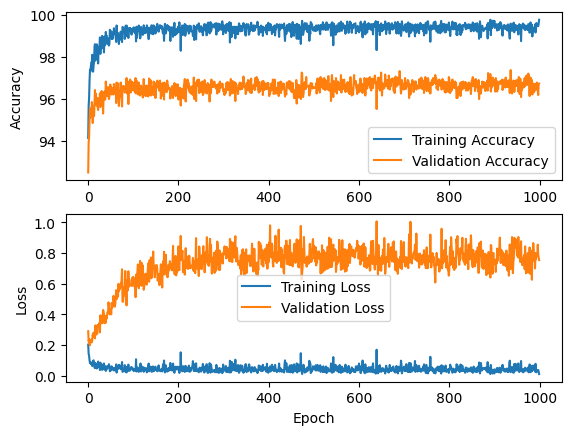

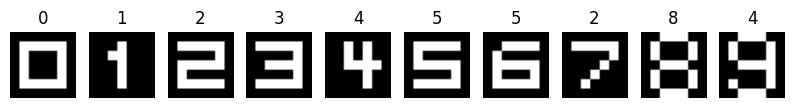

In [17]:
print("Test 1:")

model1 = build_model([128])
print(model1)

validate_loss = train_model(model1, train_data=(X_train, y_train), validate_data=(X_validate, y_validate), num_epochs=num_epochs, batch_size=batch_size)
predict_digits(model1)

Test 2:
Sequential(
  (0): Linear(in_features=784, out_features=256, bias=False)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=False)
)
Training completed.
Training loss: 0.047
Validation loss: 1.275
Validation accuracy: 97.048%


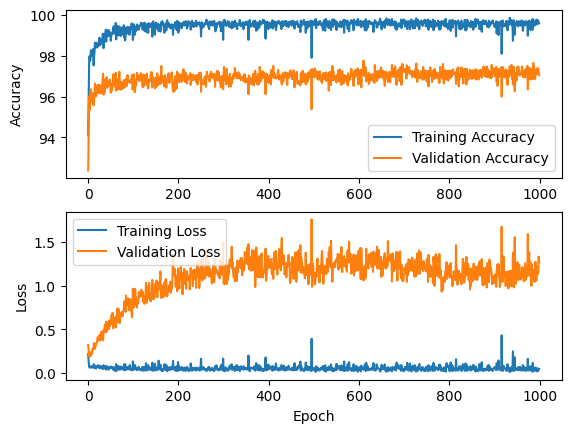

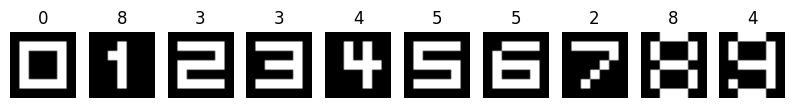

In [18]:
print("Test 2:")

model2 = build_model([256])
print(model2)

validate_loss = train_model(model2, train_data=(X_train, y_train), validate_data=(X_validate, y_validate), num_epochs=num_epochs, batch_size=batch_size)
predict_digits(model2)

Test 3:
Sequential(
  (0): Linear(in_features=784, out_features=512, bias=False)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=False)
)
Training completed.
Training loss: 0.126
Validation loss: 2.523
Validation accuracy: 96.738%


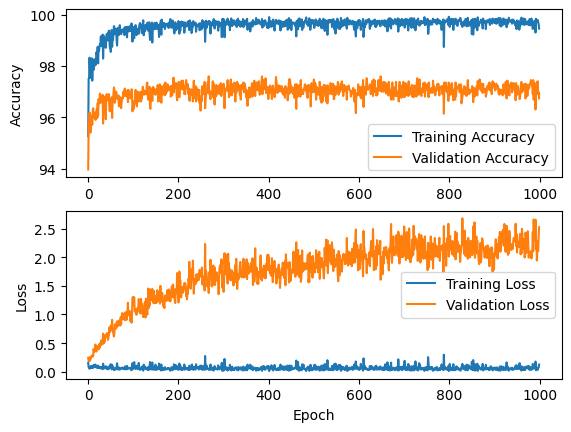

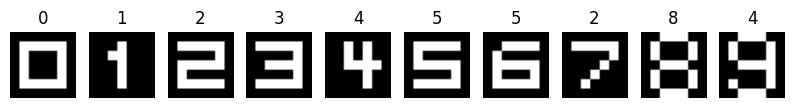

In [19]:
print("Test 3:")

model3 = build_model([512])
print(model3)

validate_loss = train_model(model3, train_data=(X_train, y_train), validate_data=(X_validate, y_validate), num_epochs=num_epochs, batch_size=batch_size)
predict_digits(model3)

In [20]:
X_test = test_df.to_numpy()

y_test = predict(model2, X_test)

In [21]:
# Create submission dataframe
submission_df = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
submission_df["Label"] = y_test
submission_df.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [22]:
submission_df.to_csv("submission.csv", index=False)